<a href="https://colab.research.google.com/github/Keerthana-ak-commits/Forest-fire-detection-using-deep-learning/blob/main/Forest_Fire_Detection_using_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-wildfire-dataset


In [6]:
import os

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import EfficientNetB0, ResNet50, MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
        print('GPU is available')
else:
        print('GPU is NOT available')


GPU is available


In [4]:
train_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train'
val_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val'
test_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test'


In [7]:
classes = os.listdir(train_dir)
num_classes = len(classes)

print(f'Number of classes : {num_classes}')
print(f'Classes : {classes}')

Number of classes : 2
Classes : ['nofire', 'fire']


In [8]:
IMG_SIZE = 224
BATCH_SIZE = 32

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE, class_mode='binary', subset='training')

val_generator = train_datagen.flow_from_directory(
    val_dir, target_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE, class_mode='binary', subset='validation')


Found 1510 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [10]:
def create_model():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
    base_model.trainable = False
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [11]:
print("Training ResNet50...")
model = create_model()
start_time = time.time()
history = model.fit(train_generator, validation_data=val_generator, epochs=5, verbose=1)
training_time = time.time() - start_time
_, accuracy = model.evaluate(val_generator)

Training ResNet50...
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 388s 8s/step - accuracy: 0.5501 - loss: 0.7442 - val_accuracy: 0.6125 - val_loss: 0.6486
Epoch 2/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 313s 6s/step - accuracy: 0.5877 - loss: 0.6684 - val_accuracy: 0.6125 - val_loss: 0.6686
Epoch 3/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 317s 7s/step - accuracy: 0.6080 - loss: 0.6689 - val_accuracy: 0.6500 - val_loss: 0.6563
Epoch 4/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 311s 6s/step - accuracy: 0.5987 - loss: 0.6588 - val_accuracy: 0.6125 - val_loss: 0.6412
Epoch 5/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 324s 7s/step - accuracy: 0.6211 - loss: 0.6430 - val_accuracy: 0.6125 - val_loss: 0.6406
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.5953 - loss: 0.6425


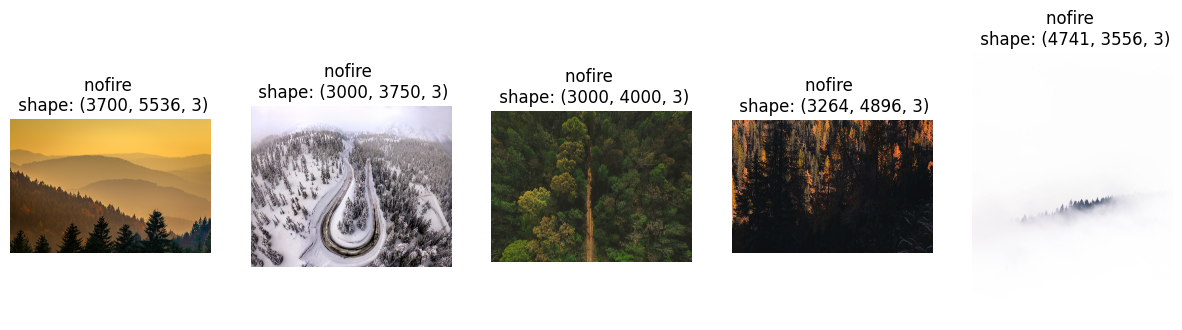

In [12]:
plt.figure(figsize=(15, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[0])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[0]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

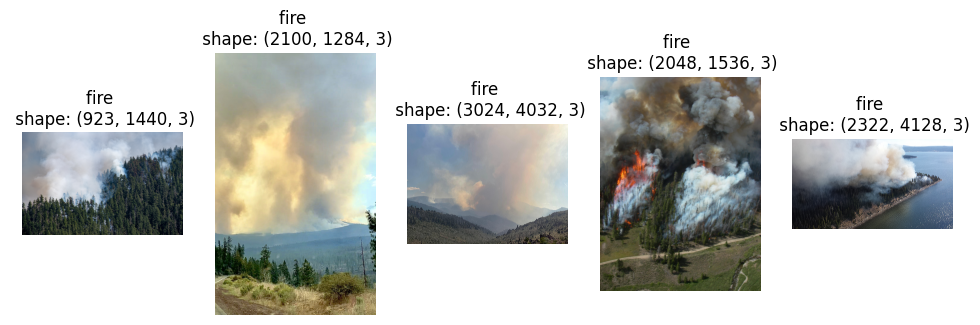

In [ ]:

plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[1])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[1]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

In [ ]:
IMG_SIZE = 224
BATCH_SIZE = 32

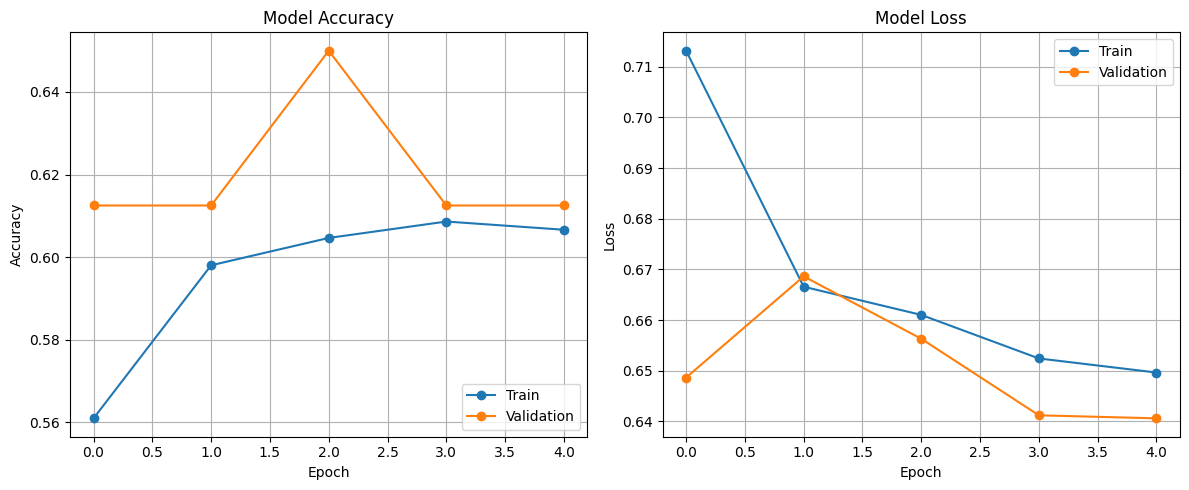

In [21]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], marker='o')
plt.plot(history.history['val_accuracy'], marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], marker='o')
plt.plot(history.history['val_loss'], marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()


In [22]:
# Evaluate ResNet50 model
val_loss, val_accuracy = model.evaluate(val_gen)
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

# Generate predictions
val_gen.reset()
predictions = model.predict(val_gen, verbose=1)
predicted_classes = (predictions > 0.5).astype(int).flatten()
true_classes = val_gen.classes
class_labels = list(val_gen.class_indices.keys())

# Metrics
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

print("\nConfusion Matrix:")
print(confusion_matrix(true_classes, predicted_classes))


13/13 ━━━━━━━━━━━━━━━━━━━━ 89s 6s/step - accuracy: 0.6259 - loss: 0.6614
Validation Accuracy: 0.6119
Validation Loss: 0.6682
13/13 ━━━━━━━━━━━━━━━━━━━━ 87s 6s/step

Classification Report:
              precision    recall  f1-score   support

        fire       0.00      0.00      0.00       156
      nofire       0.61      1.00      0.76       246

    accuracy                           0.61       402
   macro avg       0.31      0.50      0.38       402
weighted avg       0.37      0.61      0.46       402


Confusion Matrix:
[[  0 156]
 [  0 246]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,050,852 (15.45 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 4,049,571 (15.45 MB)